## Визуализация

In [51]:
# Необходимые библиотеки
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Данные для задачи регрессии

In [52]:
df_r = pd.read_csv('../data/regression/avocado.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)

# Преобразуем дату в datetime и исходя из неё добавим
# в dataframe две колонки с месяцем и временем года
df_r['Date'] = pd.to_datetime(df_r['Date'])
df_r['month'] = df_r['Date'].dt.month
# 1 = spring, 2 = summer, 3 = autumn, 4 = winter
df_r['seasons'] = 4
df_r.loc[np.logical_and(np.array(3 <= df_r['month']), np.array(df_r['month'] <= 5)), 'seasons'] = 1
df_r.loc[np.logical_and(np.array(6 <= df_r['month']), np.array(df_r['month'] <= 8)), 'seasons'] = 2
df_r.loc[np.logical_and(np.array(9 <= df_r['month']), np.array(df_r['month'] <= 11)), 'seasons'] = 3
# Переименует столбцы
df_r.rename(columns={'Date' : 'date', 'AveragePrice' : 'y', 'Total Volume' : 'total_volume',
                     'Total Bags' : 'total_bags' ,'Small Bags' : 'small_bags' ,'Large Bags' : 'large_bags' ,'XLarge Bags' : 'xlarge_bags' }, inplace=True)
# Закодируем бинарный признак type
df_r = pd.get_dummies(data=df_r, columns=['type'], drop_first=True)
# Наш датасет для задачи регрессии
df_r

date     y  total_volume     4046       4225    4770  total_bags  \
0     2015-12-27  1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1     2015-12-20  1.35      54876.98   674.28   44638.81   58.33     9505.56   
2     2015-12-13  0.93     118220.22   794.70  109149.67  130.50     8145.35   
3     2015-12-06  1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4     2015-11-29  1.28      51039.60   941.48   43838.39   75.78     6183.95   
...          ...   ...           ...      ...        ...     ...         ...   
18244 2018-02-04  1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245 2018-01-28  1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246 2018-01-21  1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247 2018-01-14  1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248 2018-01-07  1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       small_bags  large_bags  xlarge_bags  year            region  month  \
0         8603.62       93.25          0.0  2015            Albany     12   
1         9408.07       97.49          0.0  2015            Albany     12   
2         8042.21      103.14          0.0  2015            Albany     12   
3         5677.40      133.76          0.0  2015            Albany     12   
4         5986.26      197.69          0.0  2015            Albany     11   
...           ...         ...          ...   ...               ...    ...   
18244    13066.82      431.85          0.0  2018  WestTexNewMexico      2   
18245     8940.04      324.80          0.0  2018  WestTexNewMexico      1   
18246     9351.80       42.31          0.0  2018  WestTexNewMexico      1   
18247    10919.54       50.00          0.0  2018  WestTexNewMexico      1   
18248    11988.14       26.01          0.0  2018  WestTexNewMexico      1   

       seasons  type_organic  
0            4             0  
1            4             0  
2            4             0  
3            4             0  
4            3             0  
...        ...           ...  
18244        4             1  
18245        4             1  
18246        4             1  
18247        4             1  
18248        4             1  

[18249 rows x 15 columns]

Text(0.5, 1.0, 'correlation')

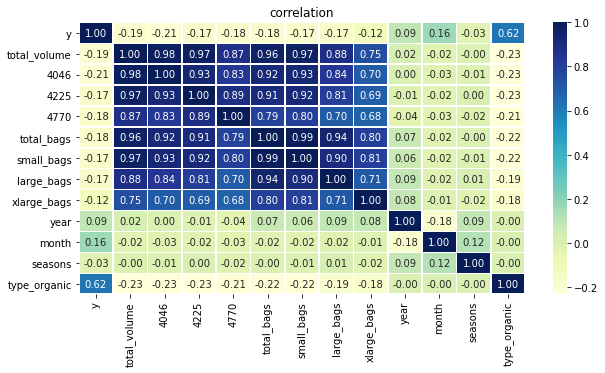

In [53]:
# Для начала посмотрим какие признаки наибольшим образом коррелируют с целевым признаком
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_r.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation")
# Как видно, бинарный признак type и порядковый признак month
# коррелирую наибольшим с целевым признаком

Text(0.5, 1.0, 'power predict score')

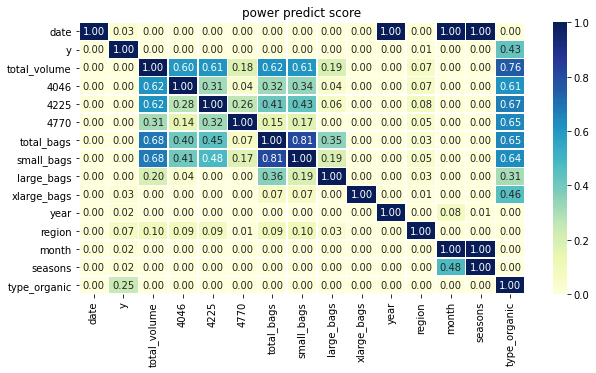

In [54]:
# Посмотрим на предсказательные характеристики признаков
import ppscore
pps = ppscore.matrix(df_r).iloc[:,:3]
df_r_cols = df_r.columns.to_list()
pps = pd.DataFrame(np.array(pps['ppscore']).reshape(df_r.shape[1], df_r.shape[1]), index=df_r_cols, columns=df_r_cols)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(pps, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("power predict score")
# Получаем неутешительные выводы, что по большей части только
# признак type обладает предсказательными свойствами для целевого признака

#### Тип авокадо

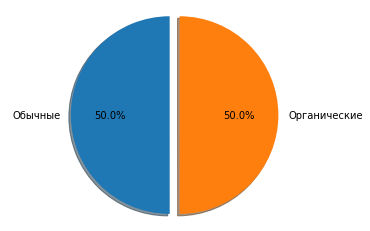

In [55]:
labels = 'Обычные', 'Органические'
sizes = [len(df_r) - df_r['type_organic'].sum(), df_r['type_organic'].sum()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
# Обычных и орзанических авокадо поровну в датасете

<AxesSubplot:xlabel='month', ylabel='y'>

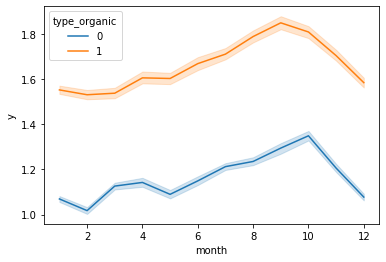

In [56]:
# Посмотрим на зависимости цен от типа авокадо
sns.lineplot(x="month", y="y", hue='type_organic', data=df_r)
# Видно, что органические авокадо ценятся больше, чем обычные

#### Дата и время

<AxesSubplot:xlabel='date'>

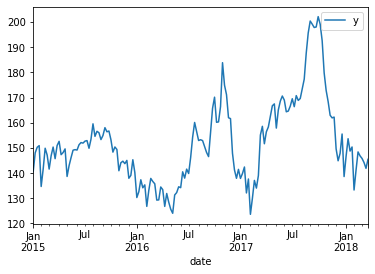

In [57]:
# Посмотрим как менялась цена за авокадо в течении всего времени
df_r[['y', 'date']].groupby('date').sum().plot()
# Видно, что в определённые месяцы цена за авокадо резко увеличивается,
# причём с каждым новым годом всё больше и больше

Рассмотрим графики за каждый год и выведем их максимумы.

y    159.55
dtype: float64

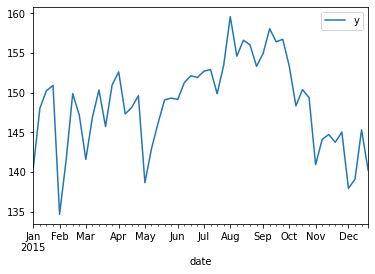

In [58]:
df_r.loc[df_r['date'] < pd.to_datetime('1/1/2016'), ['y', 'date']].groupby('date').sum().plot()
df_r.loc[df_r['date'] < pd.to_datetime('1/1/2016'), ['y', 'date']].groupby('date').sum().max()

y    183.82
dtype: float64

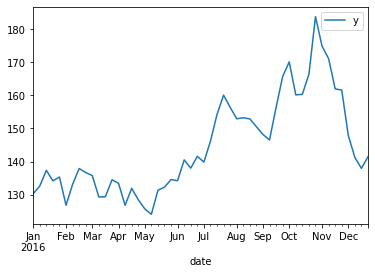

In [59]:
df_r.loc[np.logical_and(pd.to_datetime('1/1/2016') < df_r['date'], df_r['date'] < pd.to_datetime('1/1/2017')), ['y', 'date']].groupby('date').sum().plot()
df_r.loc[np.logical_and(pd.to_datetime('1/1/2016') < df_r['date'], df_r['date'] < pd.to_datetime('1/1/2017')), ['y', 'date']].groupby('date').sum().max()

y    202.1
dtype: float64

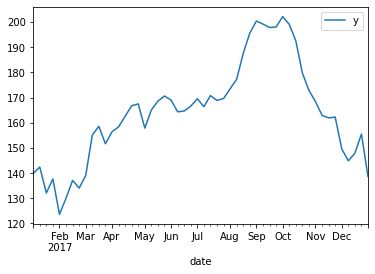

In [60]:
df_r.loc[np.logical_and(pd.to_datetime('1/1/2017') < df_r['date'], df_r['date'] < pd.to_datetime('1/1/2018')), ['y', 'date']].groupby('date').sum().plot()
df_r.loc[np.logical_and(pd.to_datetime('1/1/2017') < df_r['date'], df_r['date'] < pd.to_datetime('1/1/2018')), ['y', 'date']].groupby('date').sum().max()

Видно, что максимальная цена приходится примерно на месяцы с августа по ноябрь.

### Данные для задачи классификации

In [61]:
df_c = pd.read_csv('../data/classification/responses.csv')

music = df_c.iloc[:,:19]
movies = df_c.iloc[:,19:31]
interests = df_c.iloc[:,31:46]
hobbies = df_c.iloc[:,46:63]
phobias = df_c.iloc[:,63:73]
health = df_c.iloc[:,73:76]
traits = df_c.iloc[:,76:133]
spending = df_c.iloc[:,133:140]
demographics = df_c.iloc[:,140:150]


music['Gender'] = df_c['Gender']
movies['Gender'] = df_c['Gender']
interests['Gender'] = df_c['Gender']
hobbies['Gender'] = df_c['Gender']
phobias['Gender'] = df_c['Gender']
health['Gender'] = df_c['Gender']
traits['Gender'] = df_c['Gender']
spending['Gender'] = df_c['Gender']

music = pd.get_dummies(music, columns=['Gender'], drop_first=True)
movies = pd.get_dummies(movies, columns=['Gender'], drop_first=True)
interests = pd.get_dummies(interests, columns=['Gender'], drop_first=True)
hobbies = pd.get_dummies(hobbies, columns=['Gender'], drop_first=True)
phobias = pd.get_dummies(phobias, columns=['Gender'], drop_first=True)
health = pd.get_dummies(health, columns=['Gender', 'Smoking', 'Alcohol'], drop_first=True)
traits = pd.get_dummies(traits, columns=['Gender'], drop_first=True)
spending = pd.get_dummies(spending, columns=['Gender'], drop_first=True)
demographics = pd.get_dummies(demographics, columns=['Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats'], drop_first=True)


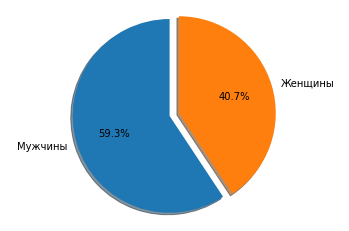

In [62]:
labels = 'Мужчины', 'Женщины'
sizes = [len(demographics) - demographics['Gender_male'].sum(), demographics['Gender_male'].sum()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
# Мужчин в датасете немного больше, чем женщин

Для начала посмотрим какие признаки наибольшим образом
коррелируют с целевым признаком и отметим их.

Text(0.5, 1.0, 'correlation music')

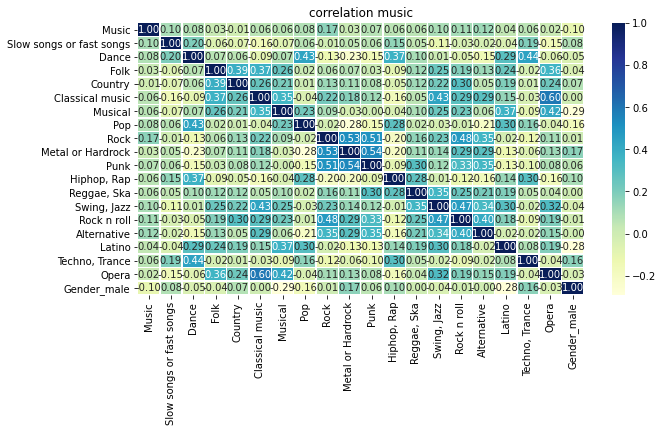

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(music.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation music")
# Корреляция с музыкальными жанрами несильно проявляется, разве что можно отметить признаки
# 'Musical', 'Metal or Hardrock', 'Latino'

Text(0.5, 1.0, 'correlation movies')

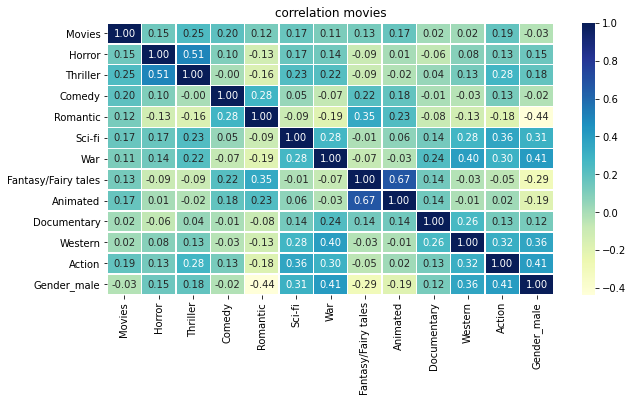

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(movies.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation movies")
# Тут уже более ярко проявляется корреляция, можно отметить:
# 'Romantic', 'Sci-fi', 'War', 'Western' и 'Action'


Text(0.5, 1.0, 'correlation interests')

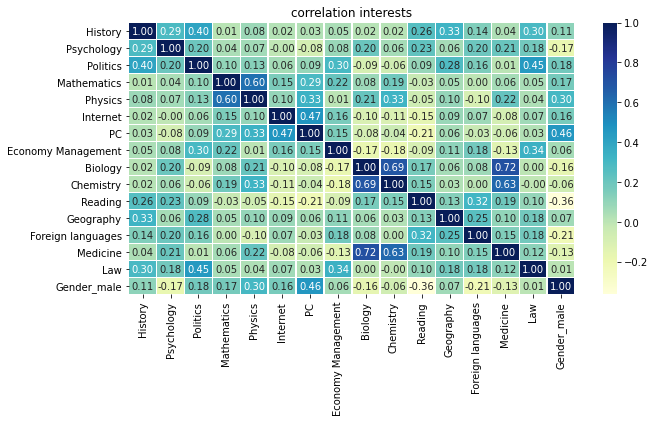

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(interests.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation interests")
# Тут 'Physics', 'PC', 'Reading'

Text(0.5, 1.0, 'correlation hobbies')

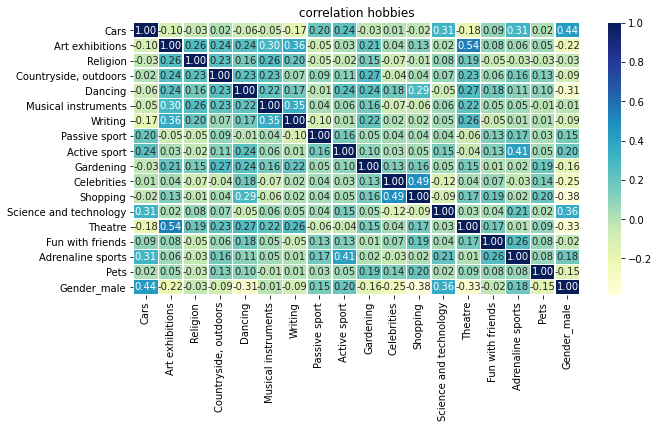

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(hobbies.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation hobbies")
# 'Cars', 'Dancing', 'Shopping', 'Science and tech.', 'Theatre'

Text(0.5, 1.0, 'correlation phobias')

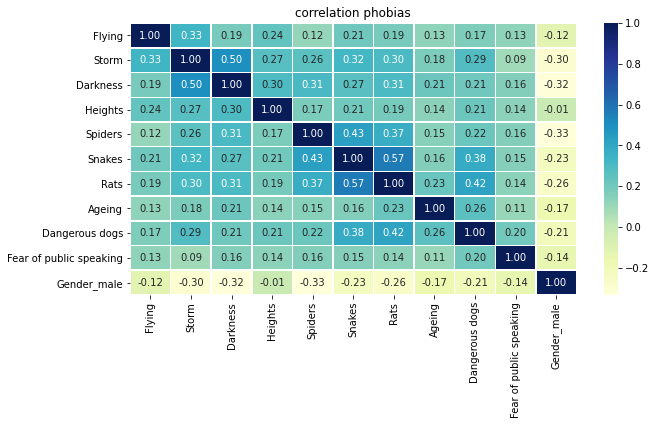

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(phobias.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation phobias")
# 'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats'

Text(0.5, 1.0, 'correlation health')

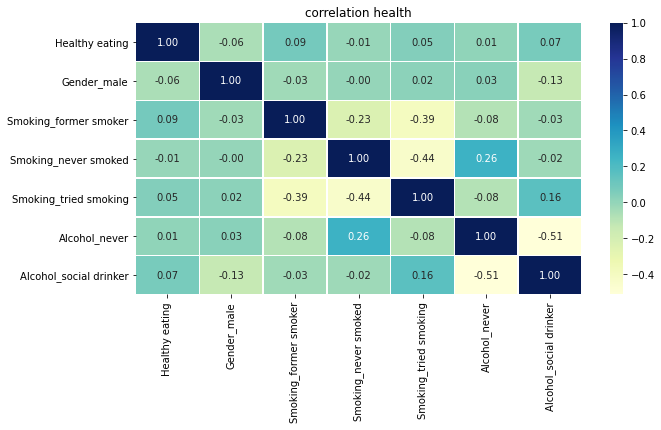

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(health.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation health")
# Тут особо нечего выделить

Text(0.5, 1.0, 'correlation spending')

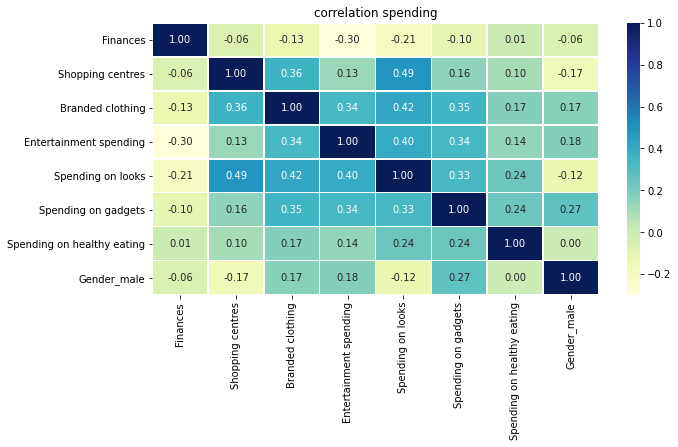

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(spending.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation spending")
# 'Spending on gadgets'

Text(0.5, 1.0, 'correlation demographics')

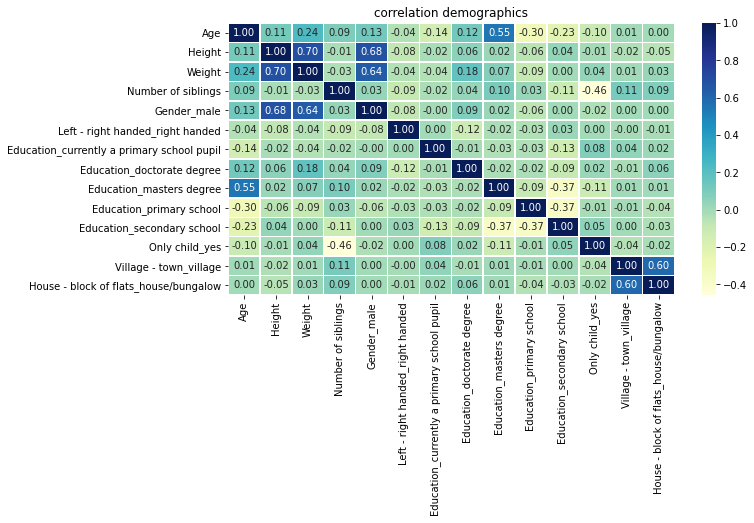

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(demographics.corr(method="pearson"), fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, annot=True)
plt.title("correlation demographics")
# 'Height', 'Weight'

Text(0.5, 0, 'Height and Weight')

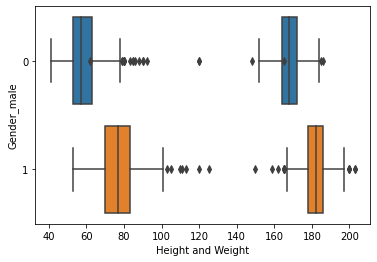

In [71]:
# Видно, что наибольшим образом коррелируют признаки роста и веса с полом, но опрашиваемые
# чаще всего не указывали именно эти два признака. Рассмотрим их поподробнее.
sns.boxplot(y="Gender_male", x="Height", data=demographics, orient="h")
sns.boxplot(y="Gender_male", x="Weight", data=demographics, orient="h")
plt.xlabel('Height and Weight')
# Несложно заметить, что мужчины в среднем больше весят и обладают более высоким ростом, нежели женщины
